In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-dataset/Cleaned_HR_Data_Analysis.csv
/kaggle/input/hr-analytics-dataset/Messy_HR_Dataset_Detailed.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# HR DATA OVERVIEW

In [7]:
df=pd.read_csv("/kaggle/input/hr-analytics-dataset/Cleaned_HR_Data_Analysis.csv",
              parse_dates=['StartDate','DOB','Training Date','Survey Date','DOB'])
df

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,2019-09-20,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,2023-07-15,Leadership Development,Internal,Failed,2,606.11,50
1,3428,2023-02-11,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,2022-09-12,Customer Service,External,Incomplete,4,673.02,58
2,3429,2018-12-10,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,2022-08-13,Leadership Development,External,Failed,2,413.28,27
3,3430,2021-06-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,2022-12-15,Project Management,External,Completed,3,663.78,23
4,3431,2019-06-29,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,2023-07-13,Technical Skills,External,Failed,5,399.03,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,3421,2022-05-09,Production Technician I,PL,Active,Part-Time,Zone A,Part-Time,Production,Wireless,...,5,4,2,2023-01-22,Customer Service,External,Passed,1,786.71,63
2841,3423,2020-12-28,Production Technician I,SVG,Active,Part-Time,Zone A,Full-Time,Production,Engineers,...,4,5,3,2022-10-14,Technical Skills,External,Completed,1,439.65,19
2842,3424,2020-12-09,Production Technician I,TNS,Terminated,Contract,Zone B,Temporary,Production,Wireline Construction,...,2,4,5,2022-08-18,Project Management,Internal,Completed,5,981.13,23
2843,3425,2019-05-28,Production Technician I,WBL,Terminated,Contract,Zone B,Full-Time,Production,Aerial,...,5,2,3,2023-05-19,Technical Skills,External,Completed,3,184.27,65


In [6]:
df.shape

(2845, 28)

In [8]:
df.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,2019-09-20,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,2023-07-15,Leadership Development,Internal,Failed,2,606.11,50
1,3428,2023-02-11,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,2022-09-12,Customer Service,External,Incomplete,4,673.02,58
2,3429,2018-12-10,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,2022-08-13,Leadership Development,External,Failed,2,413.28,27
3,3430,2021-06-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,2022-12-15,Project Management,External,Completed,3,663.78,23
4,3431,2019-06-29,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,2023-07-13,Technical Skills,External,Failed,5,399.03,50


In [9]:
df.tail()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
2840,3421,2022-05-09,Production Technician I,PL,Active,Part-Time,Zone A,Part-Time,Production,Wireless,...,5,4,2,2023-01-22,Customer Service,External,Passed,1,786.71,63
2841,3423,2020-12-28,Production Technician I,SVG,Active,Part-Time,Zone A,Full-Time,Production,Engineers,...,4,5,3,2022-10-14,Technical Skills,External,Completed,1,439.65,19
2842,3424,2020-12-09,Production Technician I,TNS,Terminated,Contract,Zone B,Temporary,Production,Wireline Construction,...,2,4,5,2022-08-18,Project Management,Internal,Completed,5,981.13,23
2843,3425,2019-05-28,Production Technician I,WBL,Terminated,Contract,Zone B,Full-Time,Production,Aerial,...,5,2,3,2023-05-19,Technical Skills,External,Completed,3,184.27,65
2844,3426,2022-04-27,Production Technician I,BPC,Active,Full-Time,Zone B,Temporary,Production,Field Operations,...,1,3,2,2023-05-02,Leadership Development,Internal,Failed,5,675.37,32


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee ID                 2845 non-null   int64         
 1   StartDate                   2845 non-null   datetime64[ns]
 2   Title                       2845 non-null   object        
 3   BusinessUnit                2845 non-null   object        
 4   EmployeeStatus              2845 non-null   object        
 5   EmployeeType                2845 non-null   object        
 6   PayZone                     2845 non-null   object        
 7   EmployeeClassificationType  2845 non-null   object        
 8   DepartmentType              2845 non-null   object        
 9   Division                    2845 non-null   object        
 10  DOB                         2845 non-null   object        
 11  State                       2845 non-null   object      

In [11]:
df.describe()

,Employee ID,StartDate,Current Employee Rating,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Duration(Days),Training Cost,Age
count,2845.000000,2845,2845.000000,2845,2845.000000,2845.000000,2845.000000,2845,2845.000000,2845.000000,2845.000000
mean,2470.591916,2021-02-01 14:08:48.927943936,2.974692,2023-02-04 21:18:32.267135232,2.941652,3.028471,2.989104,2023-02-02 22:22:18.769771520,2.973989,559.278956,49.448506
min,1001.000000,2018-08-07 00:00:00,1.000000,2022-08-05 00:00:00,1.000000,1.000000,1.000000,2022-08-05 00:00:00,1.000000,100.040000,17.000000
25%,1736.000000,2019-11-05 00:00:00,2.000000,2022-11-05 00:00:00,2.000000,2.000000,2.000000,2022-11-06 00:00:00,2.000000,328.060000,34.000000
50%,2456.000000,2021-02-08 00:00:00,3.000000,2023-02-04 00:00:00,3.000000,3.000000,3.000000,2023-02-03 00:00:00,3.000000,571.810000,49.000000
75%,3197.000000,2022-05-02 00:00:00,3.000000,2023-05-05 00:00:00,4.000000,4.000000,4.000000,2023-05-02 00:00:00,4.000000,788.330000,65.000000
max,4000.000000,2023-08-06 00:00:00,5.000000,2023-08-05 00:00:00,5.000000,5.000000,5.000000,2023-08-05 00:00:00,5.000000,999.970000,82.000000
std,859.450107,NaN,1.012610,NaN,1.435230,1.410067,1.408816,NaN,1.419682,263.333611,17.689179


**Emoplyee ID:**

Dataset Contain **2845** Employees
Employes id range from 1001 to 4000

**Start Date:**

Employee stated **from August 7, 2018 and August 6, 2023**
The median (50th percentile) start Date is February8, 2021

**Current Employee Rating:**

The Rating Range From Min 1 & Max 5
Average employee rating is 2.97
std=1.01(moderate variability in rating)

**Survay Date:**

Surveys were conducted between **August 5, 2022, and August 5, 2023**.
The median survey date is February 4, 2023.

**Engagement, Satisfaction, and Work-Life Balance Scores:**

scores range from 1 (min) to 5 (max).
**Mean scores:**
*Engagement Score*: 2.94      ** #suggesting room for improvement.**
*Satisfaction Score*: 3.02
*Work-Life Balance Score*: 2.98
The distribution is close to a normal distribution with a slight skew toward the lower side.

**Training Duration:**

*Min*: 1 day
*Max*: 5 days
*Mean*: ~2.97 days (around 3 days)
*Median* (50%): 3 days
**Most employees undergo training for about 3 days, but some have shorter (1 day) or longer (5 days) training sessions.**

**Training Cost:**

*Min*: ₹100
*Max*: ₹999.97 (~₹1000)
*Mean*: ₹559.28
*Median (50%)*: ₹571.81
*Standard Deviation*: ₹263.33 (moderate variability)
**Training costs vary significantly, but most fall around ₹559-₹572.**

**Age Distribution:**

Min: 17 years
*Max:* 82 years
*Mean*: ~49.45 years
*Median* (50%): 49 years
*Standard Deviation*: ~17.69
Employees range from **17 to 82 years old**, with an average age of **49 years**. There is a mix of young and senior employees.




In [13]:
k=len(df['Employee ID'])
k

2845

In [15]:
df.describe(include='O')

,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,DOB,State,GenderCode,RaceDesc,MaritalDesc,Performance Score,Training Program Name,Training Type,Training Outcome
count,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845,2845
unique,32,10,2,3,3,3,6,25,2664,28,2,5,4,4,5,2,4
top,Production Technician I,NEL,Active,Full-Time,Zone A,Temporary,Production,Field Operations,25-12-1991,MA,Female,Asian,Single,Fully Meets,Communication Skills,External,Completed
freq,1241,291,2458,997,1013,980,1910,747,4,2523,1588,598,731,2251,633,1424,737


In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

Employee ID                   0
StartDate                     0
Title                         0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
DepartmentType                0
Division                      0
DOB                           0
State                         0
GenderCode                    0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
Survey Date                   0
Engagement Score              0
Satisfaction Score            0
Work-Life Balance Score       0
Training Date                 0
Training Program Name         0
Training Type                 0
Training Outcome              0
Training Duration(Days)       0
Training Cost                 0
Age                           0
dtype: int64

In [18]:
df.set_index('Employee ID')

,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,DOB,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
Employee ID,,,,,,,,,,,,,,,,,,,,,
3427,2019-09-20,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,07-10-1969,...,1,2,3,2023-07-15,Leadership Development,Internal,Failed,2,606.11,50
3428,2023-02-11,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,30-08-1965,...,2,1,5,2022-09-12,Customer Service,External,Incomplete,4,673.02,58
3429,2018-12-10,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,06-10-1991,...,1,2,1,2022-08-13,Leadership Development,External,Failed,2,413.28,27
3430,2021-06-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,04-04-1998,...,5,5,4,2022-12-15,Project Management,External,Completed,3,663.78,23
3431,2019-06-29,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,29-08-1969,...,2,5,3,2023-07-13,Technical Skills,External,Failed,5,399.03,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,2022-05-09,Production Technician I,PL,Active,Part-Time,Zone A,Part-Time,Production,Wireless,11-06-1959,...,5,4,2,2023-01-22,Customer Service,External,Passed,1,786.71,63
3423,2020-12-28,Production Technician I,SVG,Active,Part-Time,Zone A,Full-Time,Production,Engineers,10-06-2001,...,4,5,3,2022-10-14,Technical Skills,External,Completed,1,439.65,19
3424,2020-12-09,Production Technician I,TNS,Terminated,Contract,Zone B,Temporary,Production,Wireline Construction,27-01-1997,...,2,4,5,2022-08-18,Project Management,Internal,Completed,5,981.13,23


In [19]:
x1=df.pivot_table(index='Training Program Name', values="Training Cost", aggfunc=['max','min','mean'])
x1

,max,min,mean
,Training Cost,Training Cost,Training Cost
Training Program Name,,,
Communication Skills,999.97,100.04,544.303318
Customer Service,997.20,101.21,569.882463
Leadership Development,999.96,100.55,561.423658
Project Management,999.83,101.56,562.922735
Technical Skills,998.74,100.17,560.117551


on Average training cost for each training program is in between 544 to 570

Maximum Training Cost For each program near to 1000

Manimum Training Cost For each program near to 100


In [21]:
x2=df.pivot_table(index='Training Type', values='Training Cost', aggfunc=['max','min','mean'])
x2

,max,min,mean
,Training Cost,Training Cost,Training Cost
Training Type,,,
External,999.97,100.17,557.508055
Internal,999.96,100.04,561.053596


In [23]:
x3 = df.pivot_table(index="Training Duration(Days)" , values="Training Cost" , aggfunc=["max" , "min" , "mean"])
x3

,max,min,mean
,Training Cost,Training Cost,Training Cost
Training Duration(Days),,,
1,999.96,100.04,574.434524
2,999.00,101.21,560.201311
3,999.97,102.19,540.377737
4,997.13,100.17,562.072063
5,997.89,101.56,559.282570


In [24]:
x4 = df.pivot_table(index="Training Outcome" , values="Training Cost" , aggfunc=["max" , "min" , "mean"])
x4

,max,min,mean
,Training Cost,Training Cost,Training Cost
Training Outcome,,,
Completed,999.96,102.16,565.030692
Failed,998.32,100.04,557.121737
Incomplete,999.06,100.17,552.875978
Passed,999.97,100.45,561.934203


In [25]:
with pd.ExcelWriter("HR2.xlsx") as writer:
    x1.to_excel(writer, sheet_name="Sheet 1", index=True)
    x2.to_excel(writer, sheet_name="Sheet 2", index=True)
    x3.to_excel(writer, sheet_name="Sheet 3", index=True)
    x4.to_excel(writer, sheet_name="Sheet 4", index=True)

# Data Visualization

In [26]:
df.columns

Index(['Employee ID', 'StartDate', 'Title', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'DepartmentType', 'Division', 'DOB', 'State', 'GenderCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating',
       'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Training Duration(Days)',
       'Training Cost', 'Age'],
      dtype='object')

In [28]:
df['BusinessUnit'].unique()

array(['CCDR', 'EW', 'PL', 'TNS', 'BPC', 'WBL', 'NEL', 'SVG', 'MSC',
       'PYZ'], dtype=object)

<Axes: title={'center': 'Business Units'}, ylabel='count'>

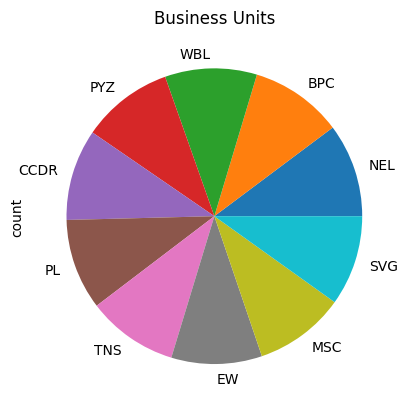

In [30]:
df['BusinessUnit'].value_counts().plot(kind='pie', title="Business Units")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee ID                 2845 non-null   int64         
 1   StartDate                   2845 non-null   datetime64[ns]
 2   Title                       2845 non-null   object        
 3   BusinessUnit                2845 non-null   object        
 4   EmployeeStatus              2845 non-null   object        
 5   EmployeeType                2845 non-null   object        
 6   PayZone                     2845 non-null   object        
 7   EmployeeClassificationType  2845 non-null   object        
 8   DepartmentType              2845 non-null   object        
 9   Division                    2845 non-null   object        
 10  DOB                         2845 non-null   object        
 11  State                       2845 non-null   object      

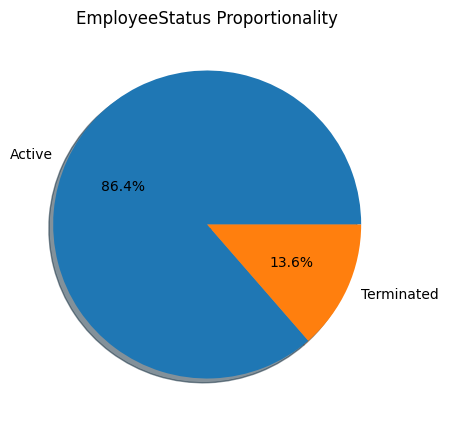

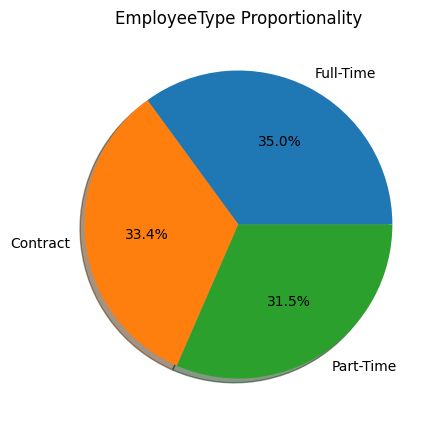

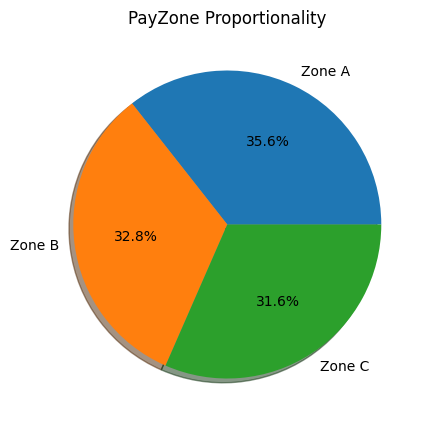

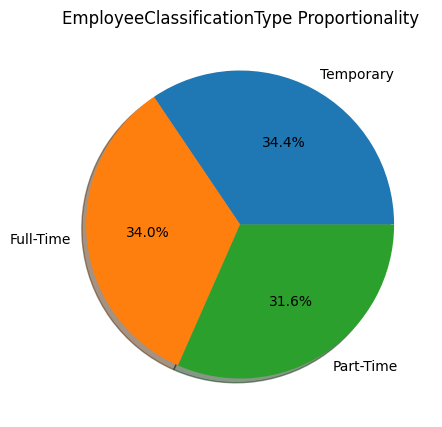

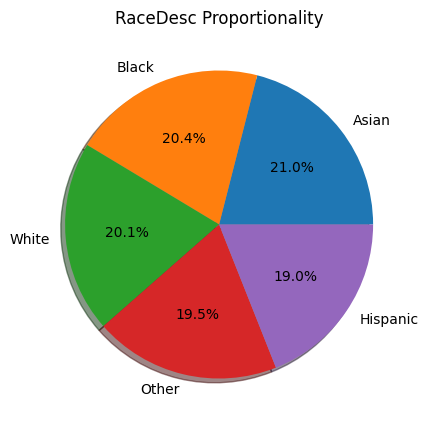

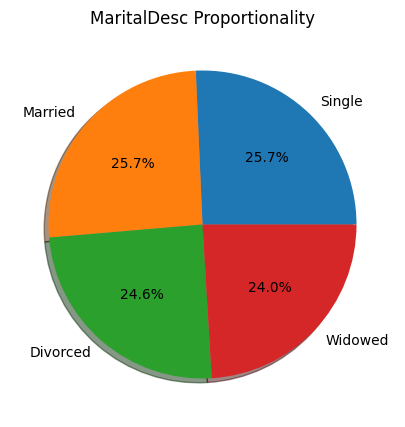

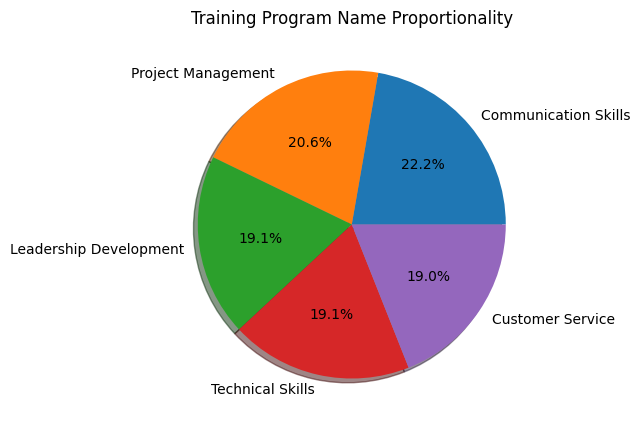

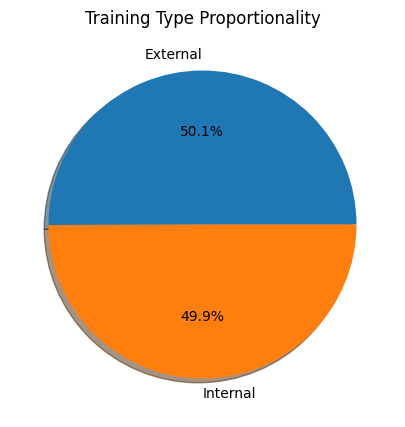

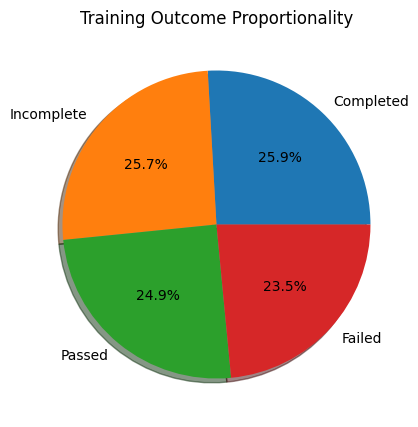

In [35]:
categorical =['EmployeeStatus','EmployeeType','PayZone','EmployeeClassificationType','RaceDesc','MaritalDesc','Training Program Name','Training Type','Training Outcome']

for col in categorical:
    plt.figure(figsize=(10,5))
    values=df[col].value_counts()
    plt.pie(values, labels=values.index, autopct='%.1f%%', shadow=True)
    plt.title(f'{col} Proportionality')
    plt.show()

In [40]:
df['Title'].unique()

array(['Production Technician I', 'Area Sales Manager',
       'Production Technician II', 'IT Support', 'Network Engineer',
       'Sr. Network Engineer', 'Principal Data Architect',
       'Enterprise Architect', 'Database Administrator', 'Data Analyst',
       'Sr. DBA', 'Data Analyst ', 'Data Architect', 'CIO', 'BI Director',
       'Sr. Accountant', 'Software Engineering Manager',
       'Software Engineer', 'Shared Services Manager',
       'Senior BI Developer', 'Production Manager', 'President & CEO',
       'Administrative Assistant', 'Accountant I', 'BI Developer',
       'Sales Manager', 'IT Manager - Support', 'IT Manager - Infra',
       'IT Manager - DB', 'Director of Sales', 'Director of Operations',
       'IT Director'], dtype=object)

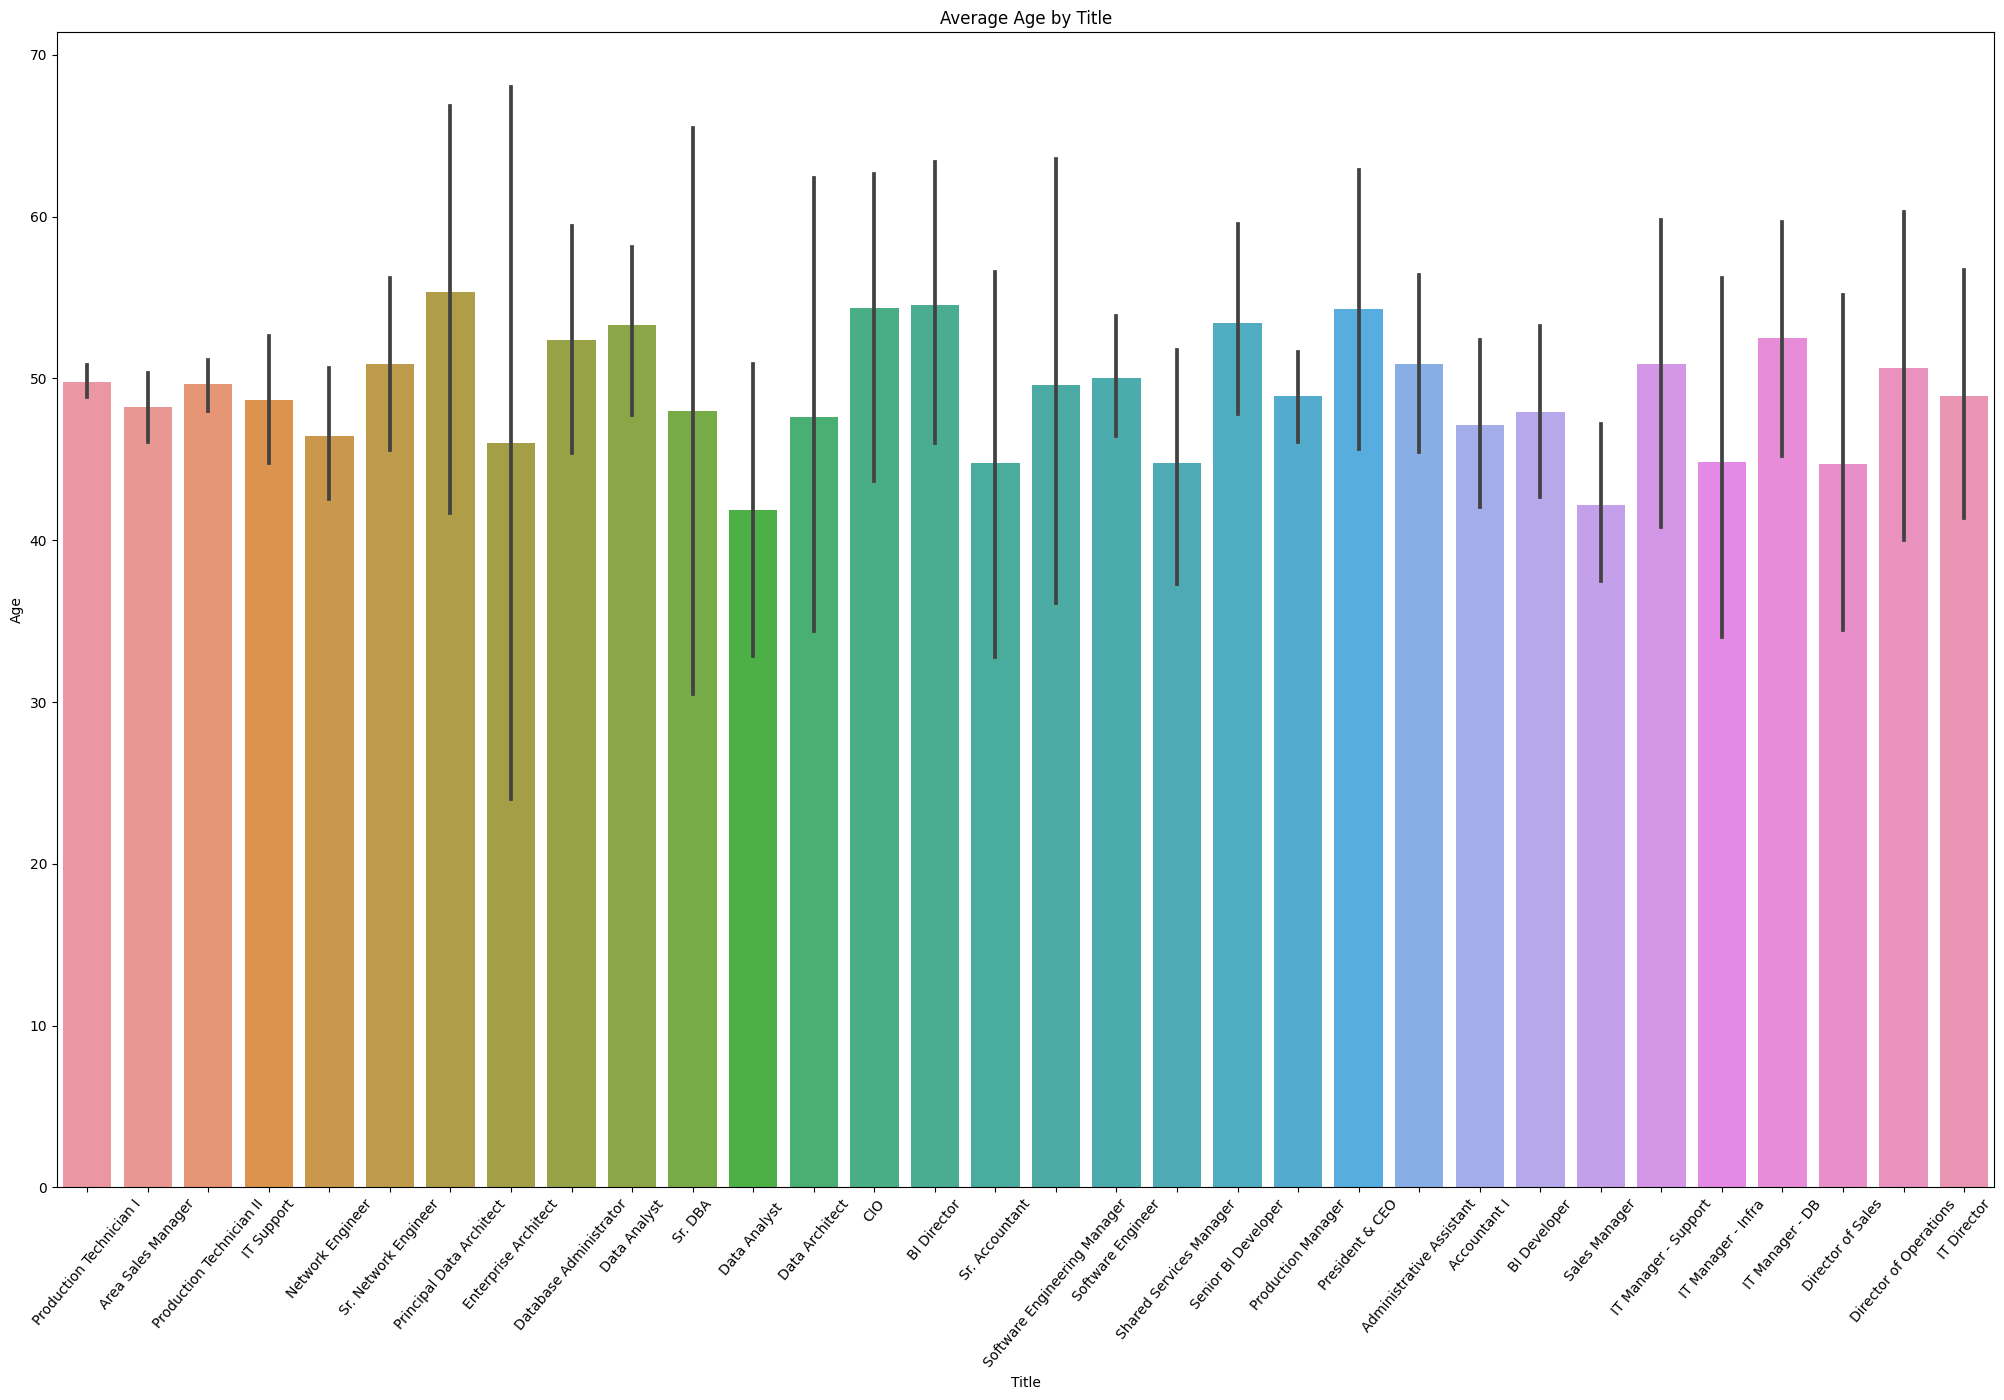

In [47]:
plt.figure(figsize=(25,15))
sns.barplot(x='Title', y="Age", data=df)
plt.title("Average Age by Title")
plt.xlabel('Title')
plt.ylabel('Age')
plt.xticks(rotation=50)
plt.show()

 **Variation in Average Age:**

Some job titles have employees with an average age in the mid-30s, while others have an average in the *50s or even 60s.*
Certain roles (e.g., senior or executive positions) tend to have a higher average age, while entry-level roles have a lower average age.

**Roles with the Highest Average Age:**

The tallest bars suggest that some job titles have an *older workforce*.
Leadership or specialized technical positions may be among these.

**Roles with the Lowest Average Age:**

Certain roles, possibly junior positions, entry-level jobs, or training programs, have a lower average age.

**High Standard Deviation in Some Roles:**

The presence of long error bars for some job titles suggests *high variation in age* within those roles.
This could mean the role includes both *junior and senior employees.*


In [48]:
df

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,2019-09-20,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,2023-07-15,Leadership Development,Internal,Failed,2,606.11,50
1,3428,2023-02-11,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,2022-09-12,Customer Service,External,Incomplete,4,673.02,58
2,3429,2018-12-10,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,2022-08-13,Leadership Development,External,Failed,2,413.28,27
3,3430,2021-06-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,2022-12-15,Project Management,External,Completed,3,663.78,23
4,3431,2019-06-29,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,2023-07-13,Technical Skills,External,Failed,5,399.03,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,3421,2022-05-09,Production Technician I,PL,Active,Part-Time,Zone A,Part-Time,Production,Wireless,...,5,4,2,2023-01-22,Customer Service,External,Passed,1,786.71,63
2841,3423,2020-12-28,Production Technician I,SVG,Active,Part-Time,Zone A,Full-Time,Production,Engineers,...,4,5,3,2022-10-14,Technical Skills,External,Completed,1,439.65,19
2842,3424,2020-12-09,Production Technician I,TNS,Terminated,Contract,Zone B,Temporary,Production,Wireline Construction,...,2,4,5,2022-08-18,Project Management,Internal,Completed,5,981.13,23
2843,3425,2019-05-28,Production Technician I,WBL,Terminated,Contract,Zone B,Full-Time,Production,Aerial,...,5,2,3,2023-05-19,Technical Skills,External,Completed,3,184.27,65


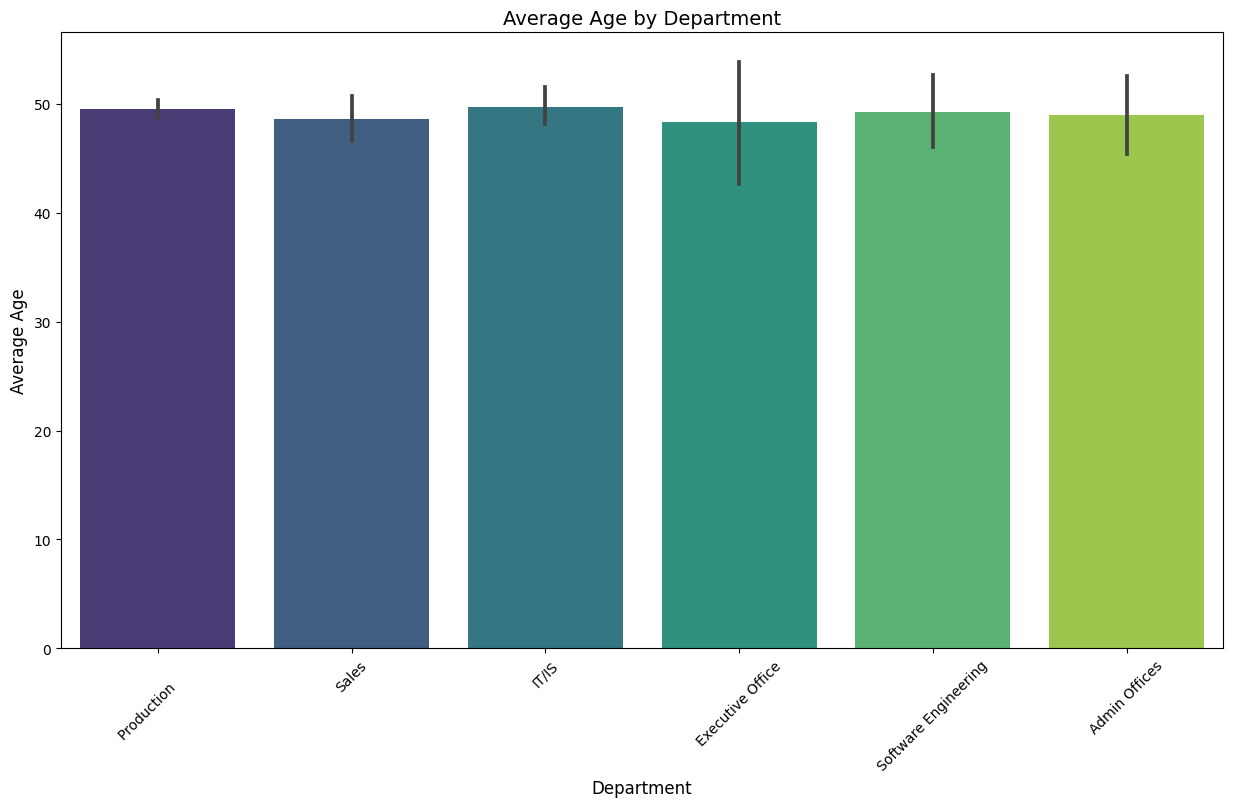

In [49]:
plt.figure(figsize=(15, 8))

sns.barplot(x='DepartmentType', y='Age', data=df, palette='viridis')
plt.title("Average Age by Department", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Average Age", fontsize=12)
plt.xticks(rotation=45)
plt.show()

The Production, IT/IS, and Software Engineering departments show slightly higher average ages.

The Executive Office has more variation, possibly indicating a mix of younger and older employees.

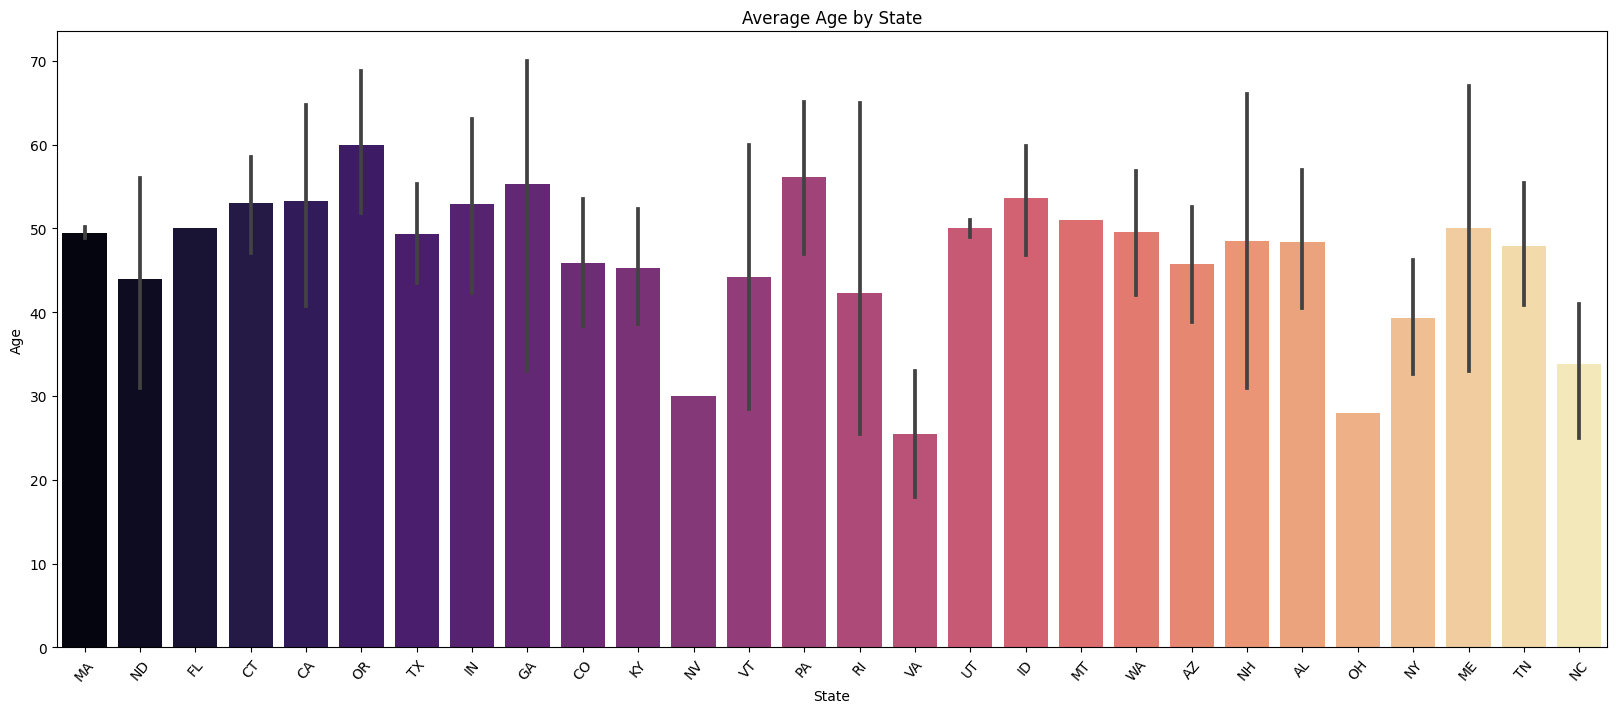

In [51]:
plt.figure(figsize=(20,8))
sns.barplot(x='State', y='Age', data=df, palette='magma')
plt.title("Average Age by State")
plt.xlabel("State")
plt.ylabel("Age")
plt.xticks(rotation=50)
plt.show()

**Variation in Average Age Across States**

Some states have a higher average age, while others have a significantly lower average age.
The oldest age groups appear in a few states with bars reaching close to 60-70 years.
Some states have much younger workforces, with average ages below 40 years.

**State-wise Distribution Trends**

Certain states have a high variance (longer error bars), indicating a mix of young and older employees.
States with lower variance have a more stable workforce in terms of age.

**Possible Reasons for Differences**

Some states may attract older professionals due to job roles requiring experience.
States with younger average ages may have more entry-level or junior positions.
Differences in education hubs, job markets, and industry presence may contribute to age variations.

<Axes: title={'center': 'Training Program Name'}, xlabel='Training Program Name'>

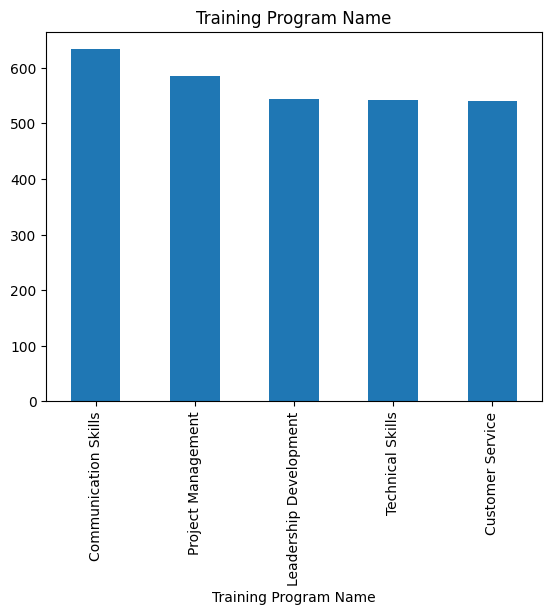

In [52]:
df['Training Program Name'].value_counts().plot(kind='bar', title='Training Program Name')

**Most Popular Training Program**

**"Communication Skills"** has the highest participation, indicating a strong focus on effective communication in the workplace.
This suggests companies prioritize interpersonal skills, collaboration, and business communication.

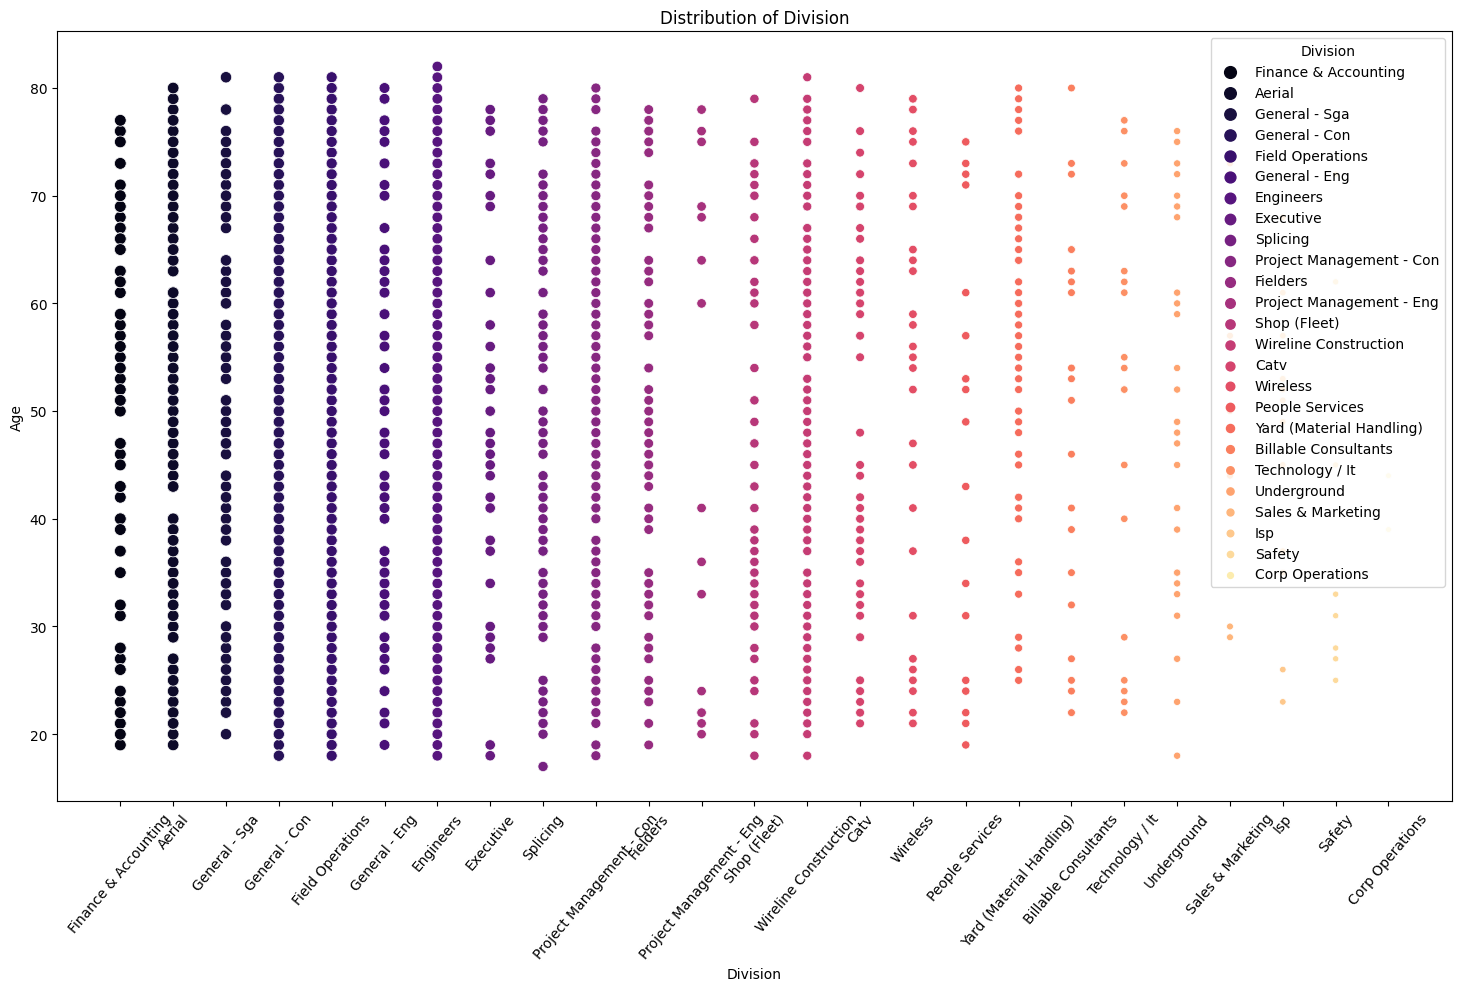

In [54]:
plt.figure(figsize=(18,10))
sns.scatterplot(x=df['Division'], y=df['Age'], hue=df['Division'], size=df['Division'], palette='magma')
plt.xlabel("Division")
plt.ylabel("Age")
plt.xticks(rotation=50)
plt.title("Distribution of Division")
plt.show()

The scatter plot shows that most divisions have a **wide range of ages**, from early 20s to over 80.

Some divisions (e.g., **Finance & Accounting, Engineers, Project Management**) seem to have a **higher density of employees in the mid-age range (30-50 years)**.

Certain departments like **Executives and Specialized roles** might have older employees, indicating **senior positions require experience**.

If some divisions lack younger employees, it may indicate a **lack of fresh talent or entry-level opportunities.**

Conversely, if there are very few senior employees in certain divisions, it could signal **high turnover or lack of long-term retention.**

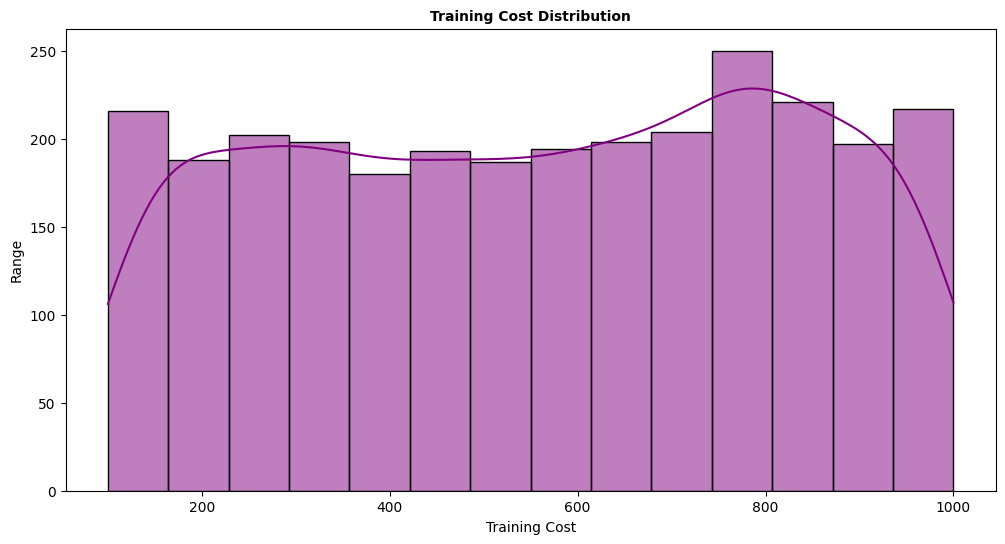

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['Training Cost'],color="purple",kde=True)
plt.xlabel('Training Cost')
plt.ylabel('Range')
plt.title('Training Cost Distribution',fontsize=10,fontweight='bold')
plt.show()

In [56]:
x1=df.pivot_table(index='EmployeeType', values="Age", aggfunc=["max","min"])
x1

,max,min
,Age,Age
EmployeeType,,
Contract,81,18
Full-Time,82,17
Part-Time,81,17


In [58]:
x2=df.pivot_table(index="DepartmentType", values="Age", aggfunc=["max","min"])
x2

,max,min
,Age,Age
DepartmentType,,
Admin Offices,78,20
Executive Office,77,22
IT/IS,81,18
Production,82,17
Sales,81,18
Software Engineering,80,19


In [59]:
x3=df.pivot_table(index='PayZone', values="Age", aggfunc=['max','min'])
x3

,max,min
,Age,Age
PayZone,,
Zone A,82,17
Zone B,81,18
Zone C,81,17


In [62]:
X4 = df.pivot_table(index="Division" , values="Age" , aggfunc=["max" , "min" ])


In [63]:
X4

,max,min
,Age,Age
Division,,
Aerial,80,19
Billable Consultants,80,22
Catv,80,21
Corp Operations,44,39
Engineers,82,18
Executive,78,18
Field Operations,81,18
Fielders,78,19
